# Exercise - Multivariate Regression with the Boston Housing Data set

The dataset contains prices of houses(MEDV) in Boston City(USA) based on various parameters. The dataset is available at https://www.kaggle.com/vikrishnan/boston-house-prices/data.
We have to predict the house prices based on the variables provided in the dataset. 

### The first step is analysis of the data. Plot & answer the following questions regarding the data.

1. Determine if there any values missing in any rows/columns. Filter out such rows. 
2. Find out the correlation of this dataset using pandas. Plot a heatmap of this matrix. Which features have a higher correlation with MEDV? Are there any features which are correlated with other features? What are those? 
3. Plot different scatter plots of all feature variables with MEDV. Observe trends based on the plots. Which features are more likely to give a precise value for MEDV?

### With the analysis done above of the dataset, remove the columns which are not likely to predict MEDV. Perform Linear regression on this new filtered dataset. 
1. Perform a 80:20 split with the train_test_split function, with random_state=0. Perform linear regression on the training dataset. Print the obtained co-efficients for every feature. Which features have more weightage? 
2. Plot a scatter of test prices vs obtained prices. Obtain the MSE, R^2 score of this model. 

### With the original dataset, i.e with all the features, perform the above steps again. Which model gives you a better accuracy?

### Perform KFold Cross validation score on both the approaches with k=3 to 10. 


In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pylab import *
import numpy as np
import seaborn as sb

In [2]:
#read csv
cols = ['CRIM', "ZN", "INDUS", "CHAS", "NOX", "RM" , "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df = pd.read_csv('./data/housing.csv', names=cols, header=None)
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### 1 . Determine if there any values missing in any rows/columns. Filter out such rows. 

In [3]:
df.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV       54
dtype: int64

In [4]:
df= df.dropna()
df.shape

(452, 14)

### 2. Find out the correlation of this dataset using pandas. Plot a heatmap of this matrix. Which features have a higher correlation with MEDV? Are there any features which are correlated with other features? What are those?

In [5]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.281239,0.573822,0.050066,0.636941,-0.142458,0.447664,-0.461967,0.897988,0.825668,0.319470,-0.413014,0.424789,-0.286245
ZN,-0.281239,1.000000,-0.514273,-0.059697,-0.500729,0.306623,-0.555679,0.656152,-0.266606,-0.269446,-0.364122,0.150380,-0.411165,0.331570
INDUS,0.573822,-0.514273,1.000000,0.103016,0.738517,-0.364895,0.605982,-0.669362,0.513306,0.673312,0.317336,-0.316752,0.565402,-0.411915
CHAS,0.050066,-0.059697,0.103016,1.000000,0.134064,0.076580,0.123141,-0.140662,0.057337,0.016894,-0.099623,0.013415,-0.009430,0.154409
NOX,0.636941,-0.500729,0.738517,0.134064,1.000000,-0.264594,0.707148,-0.745812,0.542499,0.615120,0.103464,-0.358433,0.536824,-0.332778
RM,-0.142458,0.306623,-0.364895,0.076580,-0.264594,1.000000,-0.187871,0.138774,-0.095931,-0.214948,-0.334164,0.108352,-0.607289,0.740181
AGE,0.447664,-0.555679,0.605982,0.123141,0.707148,-0.187871,1.000000,-0.720334,0.359326,0.427095,0.192956,-0.223765,0.573266,-0.299893
DIS,-0.461967,0.656152,-0.669362,-0.140662,-0.745812,0.138774,-0.720334,1.000000,-0.388385,-0.444131,-0.152253,0.234449,-0.423725,0.138798
RAD,0.897988,-0.266606,0.513306,0.057337,0.542499,-0.095931,0.359326,-0.388385,1.000000,0.872876,0.387484,-0.352586,0.309788,-0.217902
TAX,0.825668,-0.269446,0.673312,0.016894,0.615120,-0.214948,0.427095,-0.444131,0.872876,1.000000,0.384511,-0.367084,0.410927,-0.345898


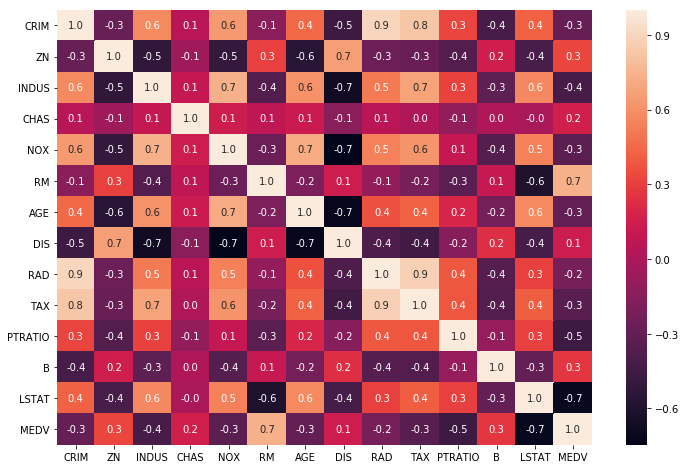

In [6]:
#for using heatmap import seaborn
plt.figure(figsize=(12,8))
sb.heatmap(df.corr(),annot=True,fmt='.1f')

### 3. Plot different scatter plots of all feature variables with MEDV. Observe trends based on the plots. Which features are more likely to give a precise value for MEDV?

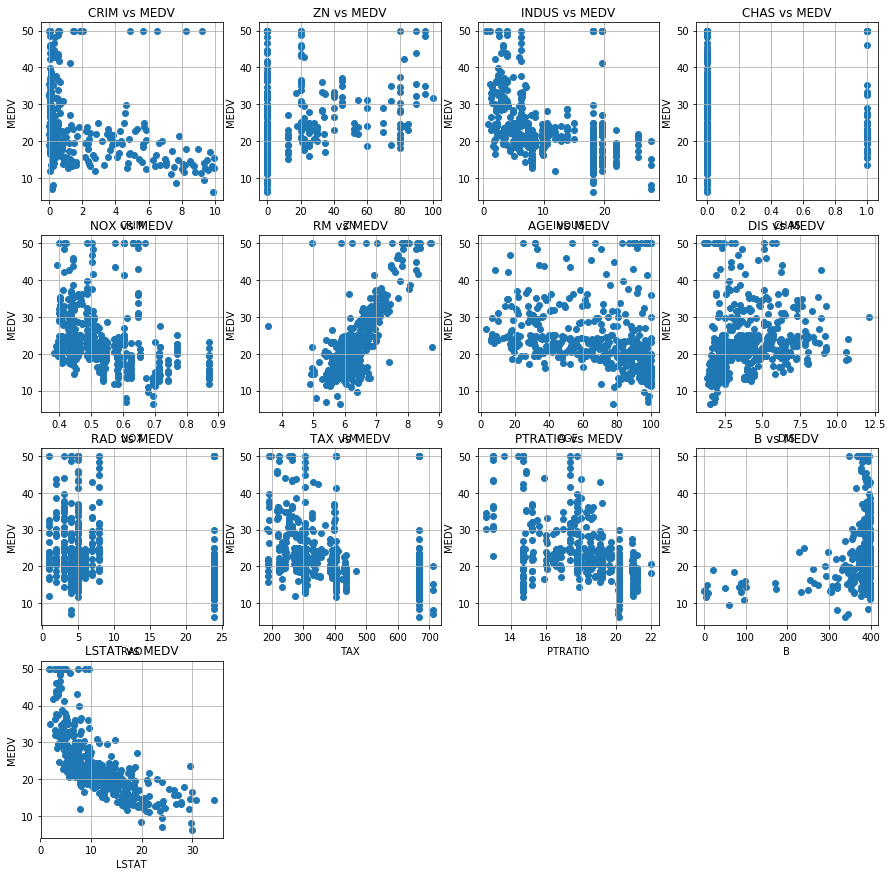

In [7]:
plt.figure(figsize=(15,15))
subplot(4,4,1)
plt.scatter(df['CRIM'],df['MEDV'])
plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.title('CRIM vs MEDV')
plt.grid()

subplot(4,4,2)
plt.scatter(df['ZN'],df['MEDV'])
plt.xlabel('ZN')
plt.ylabel('MEDV')
plt.title('ZN vs MEDV')
plt.grid()

subplot(4,4,3)
plt.scatter(df['INDUS'],df['MEDV'])
plt.xlabel('INDUS')
plt.ylabel('MEDV')
plt.title('INDUS vs MEDV')
plt.grid()

subplot(4,4,4)
plt.scatter(df['CHAS'],df['MEDV'])
plt.xlabel('CHAS')
plt.ylabel('MEDV')
plt.title('CHAS vs MEDV')
plt.grid()

subplot(4,4,5)
plt.scatter(df['NOX'],df['MEDV'])
plt.xlabel('NOX')
plt.ylabel('MEDV')
plt.title('NOX vs MEDV')
plt.grid()

subplot(4,4,6)
plt.scatter(df['RM'],df['MEDV'])
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('RM vs MEDV')
plt.grid()


subplot(4,4,7)
plt.scatter(df['AGE'],df['MEDV'])
plt.xlabel('AGE')
plt.ylabel('MEDV')
plt.title('AGE vs MEDV')
plt.grid()

subplot(4,4,8)
plt.scatter(df['DIS'],df['MEDV'])
plt.xlabel('DIS')
plt.ylabel('MEDV')
plt.title('DIS vs MEDV')
plt.grid()

subplot(4,4,9)
plt.scatter(df['RAD'],df['MEDV'])
plt.xlabel('RAD')
plt.ylabel('MEDV')
plt.title('RAD vs MEDV')
plt.grid()

subplot(4,4,10)
plt.scatter(df['TAX'],df['MEDV'])
plt.xlabel('TAX')
plt.ylabel('MEDV')
plt.title('TAX vs MEDV')
plt.grid()

subplot(4,4,11)
plt.scatter(df['PTRATIO'],df['MEDV'])
plt.xlabel('PTRATIO')
plt.ylabel('MEDV')
plt.title('PTRATIO vs MEDV')
plt.grid()

subplot(4,4,12)
plt.scatter(df['B'],df['MEDV'])
plt.xlabel('B')
plt.ylabel('MEDV')
plt.title('B vs MEDV')
plt.grid()

subplot(4,4,13)
plt.scatter(df['LSTAT'],df['MEDV'])
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('LSTAT vs MEDV')
plt.grid()


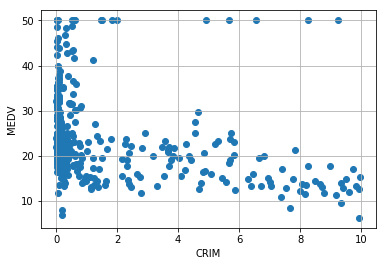

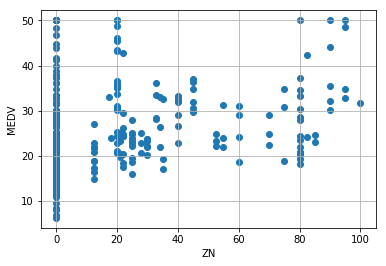

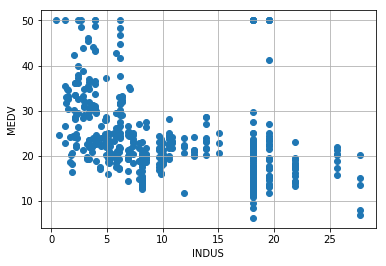

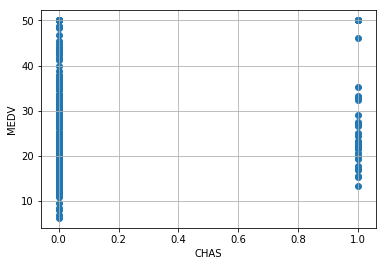

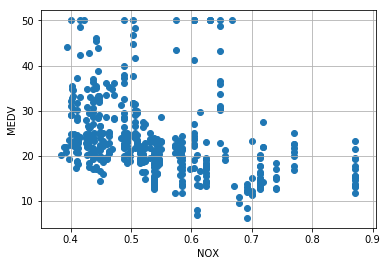

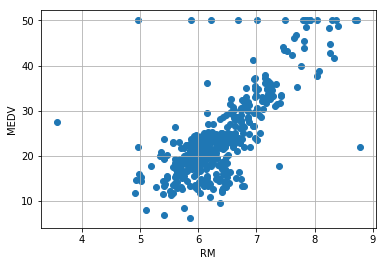

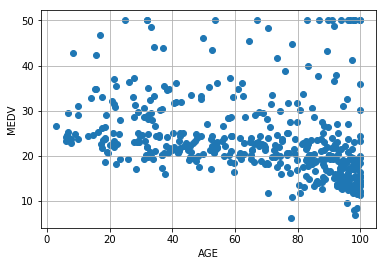

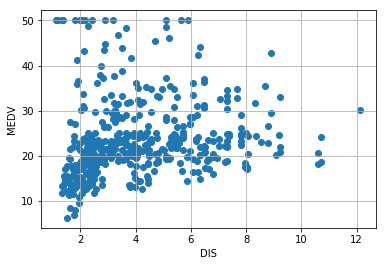

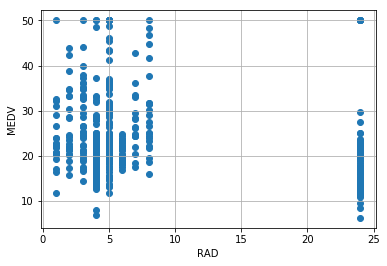

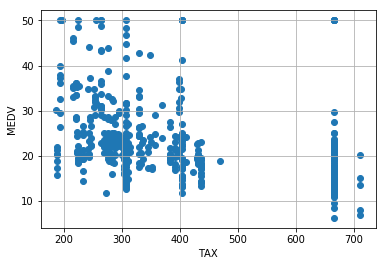

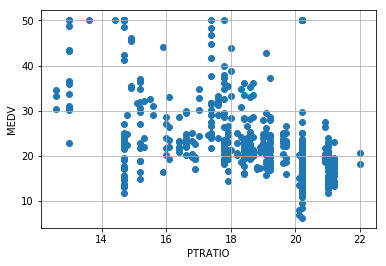

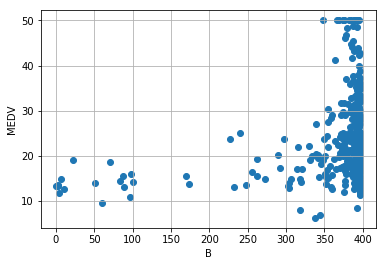

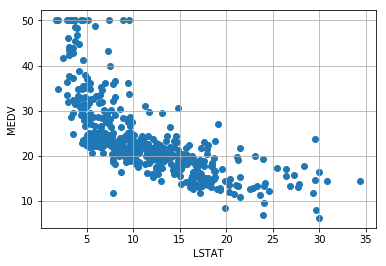

In [8]:
for i in df:
    if i=='MEDV':
        continue
    plt.figure()
    plt.scatter(df[i],df['MEDV'])
    plt.xlabel(i)
    plt.ylabel('MEDV')
    plt.grid()

### 1. Perform a 80:20 split with the train_test_split function, with random_state=0. Perform linear regression on the training dataset. Print the obtained co-efficients for every feature. Which features have more weightage? 

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lm = LinearRegression()

cols = ['INDUS','NOX','RM','AGE','DIS','PTRATIO','LSTAT']
x = df[cols]
y = df['MEDV']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

lm_model1 = lm.fit(x_train,y_train)

obtained_y_test = lm_model1.predict(x_test)
print(obtained_y_test)

[18.43295661 14.94981079 28.40361292 26.63761001 23.07148145 14.82223001
 20.82510931 16.70509581 19.69303748 23.94580416 14.37715967 35.28170992
 25.02961537 24.43874709 22.65664069 17.37494278 20.96975403 25.47899288
 19.72157364 27.59506813 18.32955272 33.59042976 21.88118154 21.09931705
 19.17379368 20.49295325 24.63059033 30.75450188 42.01407301 26.06883214
 17.42624836 19.40542247 30.2720581  22.14192642 35.1253641  27.50509253
 27.78657659 18.70807772 19.71237141 34.85138412 30.5714029  26.36768744
 16.52727581 22.4337911  10.87192318 16.32055315 26.26673632 12.04392375
 17.41605148 22.32678006 31.46699203 14.95412433 24.36332433 22.53462923
 20.87670982 22.73200619 11.77460322 19.06838071 15.28910125 18.17589267
  7.67893389 18.67066273 29.16428822 23.96959318 32.69443932 23.60133309
 24.78784001 23.65038887 22.00539749 22.37262329 27.74294675 25.15340399
 20.05634402 18.9816803  19.00704987 15.44703621 23.21129692 17.67595905
 28.44904631  3.07229867 40.40259151 21.00554933 21

In [10]:
print(lm_model1.coef_)

[-1.68726494e-03 -1.31500534e+01  6.43653758e+00 -1.78808400e-02
 -1.15368847e+00 -9.30737301e-01 -4.68835744e-01]


### 2. Plot a scatter of test prices vs obtained prices. Obtain the MSE, R^2 score of this model.

In [11]:
from sklearn.metrics import mean_squared_error
obtained_y_test = lm_model1.predict(x_test)
mse = mean_squared_error(y_true=y_test,y_pred=obtained_y_test)
print("MSE =",mse)

MSE = 34.125248697116376


In [12]:
xx2lm_model1.score(x,y)

0.7099411809243827

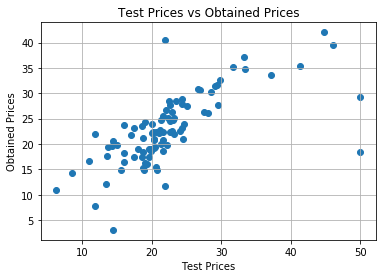

In [13]:
plt.scatter(y_test,obtained_y_test)
plt.xlabel('Test Prices')
plt.ylabel('Obtained Prices')
plt.title('Test Prices vs Obtained Prices')
plt.grid()

### With the original dataset, i.e with all the features, perform the above steps again. Which model gives you a better accuracy?

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lm = LinearRegression()


x1 = df.drop("MEDV", axis=1)
y1 = df['MEDV']

x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=0)

lm_model2 = lm.fit(x_train,y_train)

obtained_y_test = lm_model2.predict(x_test)
print(obtained_y_test)

[20.41537974 14.3981128  27.98850567 26.23930762 23.16454894 12.94286929
 20.86562189 14.05186488 17.08884    22.53652536 15.38988387 33.83032142
 24.73689297 23.75970603 21.16148391 17.19024284 19.36926082 24.90221813
 19.77547874 27.07538562 18.79214314 33.4056886  22.62959822 20.20561703
 19.07993142 17.07557284 25.19383524 34.21846621 41.43236519 25.84067081
 17.22272812 20.04746273 29.62139037 22.13748845 34.61070883 30.90720507
 28.24537525 22.39685916 19.72224726 36.17564275 32.4548275  30.19636065
 15.88868791 22.51705995 11.35469026 12.93210547 25.24643331 16.21823279
 16.44521716 21.55878338 31.09296383 16.16499363 23.11067113 22.45454304
 20.13392894 21.4652902  12.31713768 18.74652313 16.50531642 19.1821017
  8.69129    19.4506982  32.60757093 24.21410851 31.56605007 18.73421085
 23.68161543 20.40342832 21.81961106 23.03890424 26.721193   25.99963444
 20.55242237 18.63398574 20.07417092 15.91680341 21.50689789 14.60771675
 28.91638885  3.67571468 43.66238958 20.67890731 24.

In [15]:
from sklearn.metrics import mean_squared_error
obtained_y_test = lm_model2.predict(x_test)
mse = mean_squared_error(y_true=y_test,y_pred=obtained_y_test)
print("MSE =",mse)

MSE = 33.24888198748671


In [16]:
lm_model2.score(x1,y1)

0.7346586165659554

**Accuracy:** Second model has better accuracy than first one

### Perform KFold Cross validation score on both the approaches with k=3 to 10

In [19]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

print("FIRST APPROACH:-\n")

for i in range(3,11):
    scores = cross_val_score(lm_model1,x,df['MEDV'],cv=i)
    print("Accuracy: %0.2f (+/- %0.2f)"%(scores.mean(),scores.std()*2),"Cross-validated scores:",scores,"\n")
    
print("-"*100,"\nSECOND APPROACH:\n")

for i in range(3,11):
    scores = cross_val_score(lm_model2,x1,df['MEDV'],cv=i)
    print("Accuracy: %0.2f (+/- %0.2f)"%(scores.mean(),scores.std()*2),"Cross-validated scores:",scores,"\n")


FIRST APPROACH:-

Accuracy: 0.27 (+/- 0.43) Cross-validated scores: [ 0.37096714  0.45997152 -0.0355633 ] 

Accuracy: 0.48 (+/- 0.76) Cross-validated scores: [ 0.60664745  0.70477388  0.78365317 -0.16196703] 

Accuracy: 0.49 (+/- 0.74) Cross-validated scores: [ 0.57939087  0.73872482  0.63269054  0.73423516 -0.23876088] 

Accuracy: 0.31 (+/- 0.85) Cross-validated scores: [ 0.6475543   0.28690659  0.64121814  0.77291572 -0.21043491 -0.29922181] 

Accuracy: 0.45 (+/- 0.77) Cross-validated scores: [ 0.69582853  0.40550529  0.77310605  0.69042756  0.8142217  -0.16826553
 -0.09122457] 

Accuracy: 0.46 (+/- 0.62) Cross-validated scores: [ 0.71872267  0.46878437  0.74587428  0.58718043  0.77271789  0.48003943
 -0.13669771  0.08188498] 

Accuracy: 0.29 (+/- 1.30) Cross-validated scores: [ 0.7212936   0.50990545 -1.35646369  0.69052187  0.70029334  0.77696001
  0.52611189 -0.1906471   0.22616097] 

Accuracy: 0.49 (+/- 0.68) Cross-validated scores: [ 0.77348492  0.17982956  0.71119157  0.7611943